In [21]:
#adding notebook to github project
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [142]:
df = pd.read_csv('games.csv')
df.head()
df.dtypes
df.describe()

,created_at,last_move_at,turns,white_rating,black_rating,opening_ply
count,2.005800e+04,2.005800e+04,20058.000000,20058.000000,20058.000000,20058.000000
mean,1.483617e+12,1.483618e+12,60.465999,1596.631868,1588.831987,4.816981
std,2.850151e+10,2.850140e+10,33.570585,291.253376,291.036126,2.797152
min,1.376772e+12,1.376772e+12,1.000000,784.000000,789.000000,1.000000
25%,1.477548e+12,1.477548e+12,37.000000,1398.000000,1391.000000,3.000000
50%,1.496010e+12,1.496010e+12,55.000000,1567.000000,1562.000000,4.000000
75%,1.503170e+12,1.503170e+12,79.000000,1793.000000,1784.000000,6.000000
max,1.504493e+12,1.504494e+12,349.000000,2700.000000,2723.000000,28.000000


In [ ]:
#no columns containing na values
df.isna().sum()

In [33]:
df.columns

Index(['rated', 'created_at', 'last_move_at', 'turns', 'victory_status',
       'winner', 'increment_code', 'white_id', 'white_rating', 'black_id',
       'black_rating', 'opening_eco', 'opening_name', 'opening_ply',
       'duration'],
      dtype='object')

In [83]:
#drop --> moves
df.drop(['moves'], axis=1, inplace=True)
#opening_ply = number of moves in opening 
#increment code https://chess.stackexchange.com/questions/18069/what-is-the-increment-in-chess#:~:text=On%20chess%20servers%20(like%20Internet,amount%20added%20after%20each%20move.
#convert created and last move at to duration

In [85]:
df['duration'] = df['last_move_at'] - df['created_at']
df['duration'].value_counts()
#there are some games that have a duration of 0 but still have many moves in them. what happened here?

0.0           8548
10000000.0     734
496879.0         3
25867.0          3
1816187.0        3
              ... 
518592.0         1
783416.0         1
709501.0         1
193759.0         1
3603429.0        1
Name: duration, Length: 10327, dtype: int64

In [45]:
#how many unique openings are there
opening_eco = df['opening_eco'].nunique()
opening_name = df['opening_name'].nunique()
print('opening eco:',opening_eco)
print('opening name:',opening_name)
#weird - there are way more distinct opening names than opening ecos --> could this be misspelling?
#there are different variations of openings that are often mapped to the same opening_eco 
#for instance Ruy Lopez: Berlin Defense #2 is mapped to C65 and Ruy Lopez: Berlin Defense |  Beverwijk Variation is also mapped to C65
#because of this i think that opening name actually provides more information

opening eco: 365
opening name: 1477


In [86]:
opening_name_counts = df['opening_name'].value_counts()
opening_name_counts[0:21]

Van't Kruijs Opening                             368
Sicilian Defense                                 358
Sicilian Defense: Bowdler Attack                 296
Scotch Game                                      271
French Defense: Knight Variation                 271
Scandinavian Defense: Mieses-Kotroc Variation    259
Queen's Pawn Game: Mason Attack                  232
Queen's Pawn Game: Chigorin Variation            229
Scandinavian Defense                             223
Horwitz Defense                                  209
Caro-Kann Defense                                199
Philidor Defense #3                              198
Philidor Defense #2                              193
Indian Game                                      181
Italian Game: Anti-Fried Liver Defense           180
Four Knights Game: Italian Variation             176
Modern Defense                                   174
Owen Defense                                     168
King's Pawn Game: Wayward Queen Attack        

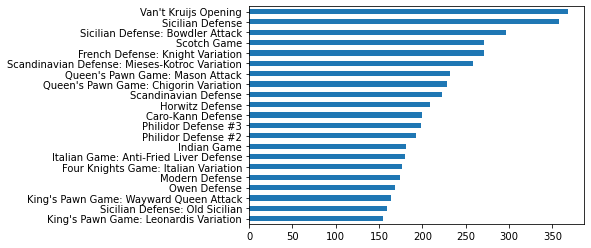

In [95]:
opening_plots_bar = opening_name_counts[0:21].plot.barh(x = 'opening', y = 'count').invert_yaxis()

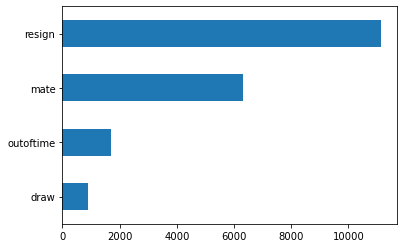

In [96]:
df['victory_status'].value_counts().plot.barh().invert_yaxis()

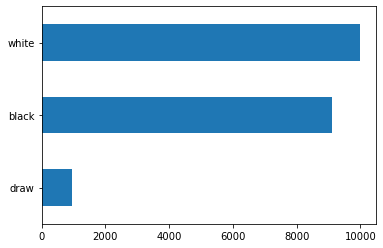

In [76]:
df['winner'].value_counts().plot.barh().invert_yaxis()

In [147]:
#dummy variables for black_win and white_win
dummy_winner = pd.get_dummies(df['winner'])
dummy_winner
df = pd.concat([df, dummy_winner], axis = 1)

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply,black,draw,white
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5,0,0,1
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4,1,0,0
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3,0,0,1
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3,0,0,1
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20053,EfqH7VVH,True,1.499791e+12,1.499791e+12,24,resign,white,10+10,belcolt,1691,jamboger,1220,d4 f5 e3 e6 Nf3 Nf6 Nc3 b6 Be2 Bb7 O-O Be7 Ne5...,A80,Dutch Defense,2,0,0,1
20054,WSJDhbPl,True,1.499698e+12,1.499699e+12,82,mate,black,10+0,jamboger,1233,farrukhasomiddinov,1196,d4 d6 Bf4 e5 Bg3 Nf6 e3 exd4 exd4 d5 c3 Bd6 Bd...,A41,Queen's Pawn,2,1,0,0
20055,yrAas0Kj,True,1.499698e+12,1.499698e+12,35,mate,white,10+0,jamboger,1219,schaaksmurf3,1286,d4 d5 Bf4 Nc6 e3 Nf6 c3 e6 Nf3 Be7 Bd3 O-O Nbd...,D00,Queen's Pawn Game: Mason Attack,3,0,0,1
20056,b0v4tRyF,True,1.499696e+12,1.499697e+12,109,resign,white,10+0,marcodisogno,1360,jamboger,1227,e4 d6 d4 Nf6 e5 dxe5 dxe5 Qxd1+ Kxd1 Nd5 c4 Nb...,B07,Pirc Defense,4,0,0,1


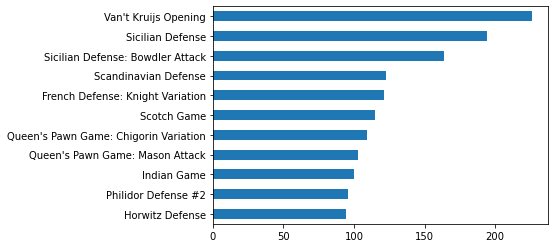

In [150]:
black_wins = df.loc[df['black'] == 1]
black_wins_counts = black_wins['opening_name'].value_counts()
black_wins_counts[0:11].plot.barh().invert_yaxis()

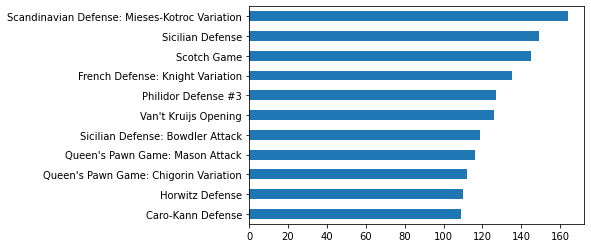

In [151]:
white_wins = df.loc[df['white'] == 1]
white_wins_counts = white_wins['opening_name'].value_counts()
white_wins_counts[0:11].plot.barh().invert_yaxis()

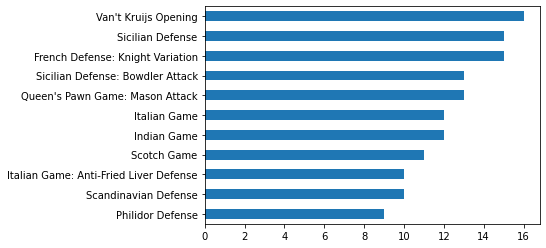

In [152]:
draw = df.loc[df['draw'] == 1]
draw_counts = draw['opening_name'].value_counts()
draw_counts[0:11].plot.barh().invert_yaxis()

In [137]:
white_better_than_black = df.loc[df['white_rating'] > df['black_rating']]
white_better_than_black
#10184
white_better_than_black['white'].value_counts()
wbtb_perc_white_win = 6529/10184
wbtb_perc_white_win

0.6411036920659858

In [141]:
black_better_than_white = df.loc[df['black_rating'] > df['white_rating']]
black_better_than_white
#9671
black_better_than_white['black'].value_counts()
#5823
bbtw_perc_black_win = 5823/9671
bbtw_perc_black_win

0.6021093992348258

In [143]:
df.corr().head()

,rated,created_at,last_move_at,turns,white_rating,black_rating,opening_ply
rated,1.000000,-0.001171,-0.001176,0.090698,0.003284,0.032655,-0.001906
created_at,-0.001171,1.000000,1.000000,0.083185,0.116170,0.133316,0.100201
last_move_at,-0.001176,1.000000,1.000000,0.083196,0.116172,0.133318,0.100203
turns,0.090698,0.083185,0.083196,1.000000,0.129753,0.160467,0.055999
white_rating,0.003284,0.116170,0.116172,0.129753,1.000000,0.634171,0.277379


In [153]:
#duration segmentation? --> long, medium, short

In [ ]:
#interesting games analysis article: https://medium.com/@bert_miller/using-python-to-build-a-statistical-model-to-predict-the-winner-of-a-professional-game-of-dota-6dbdc4255949